# Principal Component Analysis

### 1. Computing Mean, Standard Deviation, and Variance using the Pandas Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


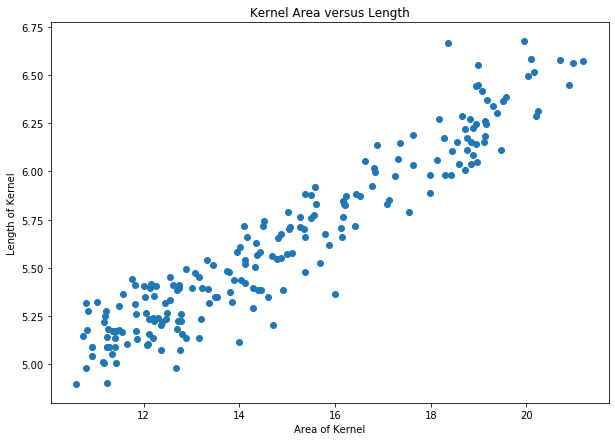

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(df['A'], df['LK'])
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Kernel Area versus Length')
plt.show()

In [7]:
df.mean()

A     14.847524
LK     5.628533
dtype: float64

In [8]:
np.mean(df.values, axis=0)

array([14.84752381,  5.62853333])

In [9]:
df.std()

A     2.909699
LK    0.443063
dtype: float64

In [12]:
np.std(df.values, axis=0)

array([2.90276331, 0.44200731])

In [13]:
df.var()

A     8.466351
LK    0.196305
dtype: float64

In [14]:
np.var(df.values, axis=0)

array([8.42603482, 0.19537046])

# Manual PCA Demo

In [15]:
df.cov()

,A,LK
A,8.466351,1.224704
LK,1.224704,0.196305


In [17]:
np.cov(df.values.T)

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))

In [43]:
ev, et,_ = np.linalg.svd(np.cov(df.T), full_matrices=False)

In [44]:
ev

array([[-0.98965371, -0.14347657],
       [-0.14347657,  0.98965371]])

In [45]:
et

array([8.64390408, 0.01875194])

In [19]:
eigenvalues

array([8.64390408, 0.01875194])

In [20]:
eigenvectors

array([[ 0.98965371, -0.14347657],
       [ 0.14347657,  0.98965371]])

In [23]:
# We use the eigenvalues as a percentage of total variance within the dataset
eigenvalues = np.cumsum(eigenvalues)

In [24]:
eigenvalues

array([8.64390408, 8.66265602])

In [25]:
eigenvalues/= eigenvalues.max()

In [26]:
eigenvalues

array([0.99783531, 1.        ])

we can see here that the first component comprises 99.7% of variation within data

In [28]:
eigenvectors

array([[ 0.98965371, -0.14347657],
       [ 0.14347657,  0.98965371]])

We use first eigenvalues as we use te first eigenvalue as principal components 

In [32]:
P=eigenvectors[0]
P

array([ 0.98965371, -0.14347657])

Using the eigenvectors, we can further reduce the dimensionality of the available data.
Note: We also can normalize data first before doing eigenvalues calculation

Now We apply dimensionality reduction process

In [33]:
x_t_p = P.dot(df.values.T)
x_t_p

array([14.27526018, 13.92917837, 13.38301702, 12.93293812, 15.16122048,
       13.45845558, 13.73985287, 13.18637087, 15.58947756, 15.42569089,
       14.28229053, 13.10461599, 12.965921  , 12.85132003, 12.81130345,
       13.67130454, 13.11079887, 14.73467174, 13.80111402, 11.83858666,
       13.20170613, 13.17202321, 14.90964958, 11.22342981, 14.02411636,
       15.18559477, 12.11123524, 11.8341322 , 13.1690102 , 12.51942567,
       12.24132164, 14.50374139, 13.12396525, 12.9944561 , 14.0747502 ,
       15.1341101 , 15.19649564, 16.06653005, 13.83537146, 13.35791196,
       12.63259857, 12.59258199, 12.28666024, 14.49642074, 14.15321181,
       12.88589119, 14.38312109, 14.03574465, 13.84140082, 13.8915942 ,
       13.47938642, 14.80264952, 13.52011369, 13.39204265, 13.54607291,
       14.05639189, 13.53734092, 13.99315553, 14.40850975, 11.24451083,
       10.58331473, 10.41048904, 11.50383281, 12.30916598, 11.89280073,
       12.00941372, 13.38386114, 13.06028843, 13.42230283, 11.82

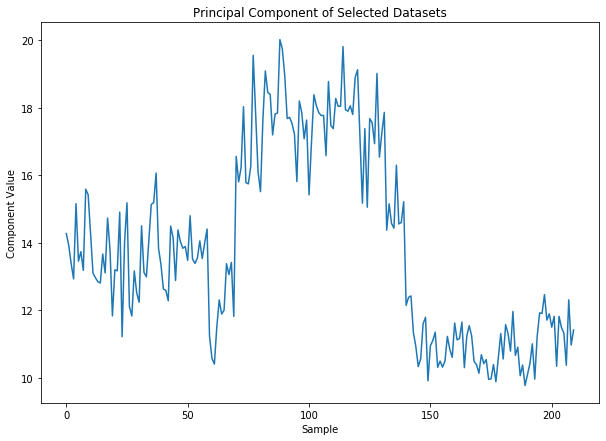

In [36]:
plt.figure(figsize=(10, 7))
plt.plot(x_t_p)
plt.title('Principal Component of Selected Datasets')
plt.xlabel('Sample')
plt.ylabel('Component Value')
plt.show()

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

# Sklearn PCA demo

In [46]:
df

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658
...,...,...
205,12.19,5.137
206,11.23,5.140
207,13.20,5.236
208,11.84,5.175


In [56]:
from sklearn.decomposition import PCA

In [57]:
model = PCA()
model.fit(df.values)

PCA()

In [58]:
PCA(copy=True, iterated_power='auto', n_components=None,
    random_state=None, svd_solver='auto', 
    tol=0.0, whiten=False)

PCA()

In [59]:
model.explained_variance_ratio_

array([0.99783531, 0.00216469])

In [60]:
model.components_

array([[ 0.98965371,  0.14347657],
       [-0.14347657,  0.98965371]])

In [61]:
model = PCA(n_components=1)
model.fit(df)

PCA(n_components=1)

In [62]:
PCA(copy=True, iterated_power='auto', n_components=None,
    random_state=None, svd_solver='auto', 
    tol=0.0, whiten=False)

PCA()

In [63]:
model.components_

array([[0.98965371, 0.14347657]])

In [64]:
data_t = model.fit_transform(df)

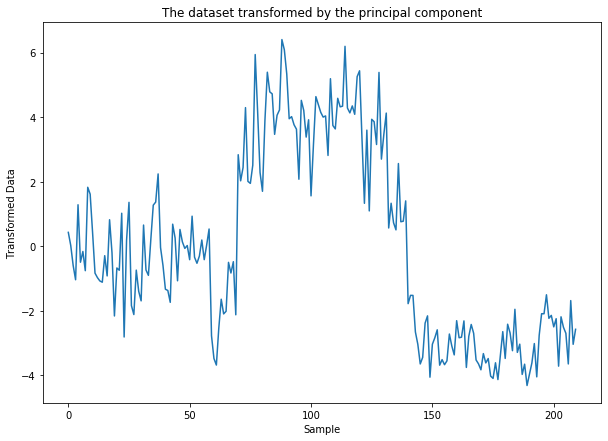

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(data_t)
plt.xlabel('Sample')
plt.ylabel('Transformed Data')
plt.title('The dataset transformed by the principal component')
plt.show()

In [69]:
data_r = model.inverse_transform(data_t)
data_r

array([[15.27060217,  5.68986977],
       [14.86874831,  5.63161039],
       [14.25354985,  5.54242104],
       [13.81749907,  5.47920391],
       [16.11757773,  5.81266136],
       [14.3551864 ,  5.55715596],
       [14.68393749,  5.60481715],
       [14.09557223,  5.51951799],
       [16.65357771,  5.89036878],
       [16.44349229,  5.85991133],
       [15.26364455,  5.68886108],
       [14.01977493,  5.50852916],
       [13.88279889,  5.48867085],
       [13.78074298,  5.47387514],
       [13.74199238,  5.46825721],
       [14.55589372,  5.58625381],
       [13.93530286,  5.49628269],
       [15.65824025,  5.7460682 ],
       [14.64289846,  5.59886746],
       [12.70663964,  5.31815535],
       [14.17833707,  5.53151695],
       [14.10977144,  5.52157655],
       [15.85725028,  5.77491999],
       [12.06178137,  5.22466603],
       [15.02944034,  5.65490696],
       [16.19139708,  5.82336343],
       [13.02446065,  5.36423194],
       [12.75022459,  5.32447414],
       [14.11275327,

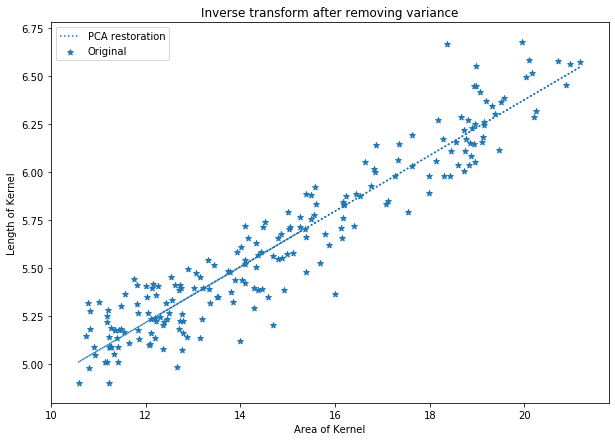

In [71]:
plt.figure(figsize=(10, 7))
plt.plot(data_r[:,0], data_r[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()